In [1]:
import numpy as np
import pandas as pd

In [3]:
df_train=pd.read_csv('trai/train.csv/train.csv')

In [4]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
df_train.shape

(595212, 59)

In [6]:
df_train.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

Class 0: 573518
Class 1: 21694


<AxesSubplot:title={'center':'Count(target)'}>

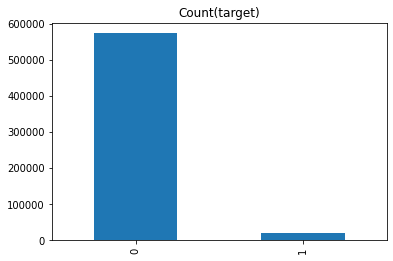

In [7]:
target_count=df_train.target.value_counts()
print('Class 0:',target_count[0])
print('Class 1:',target_count[1])
target_count.plot(kind='bar',title='Count(target)')

In [8]:
!pip install xgboost

In [9]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [10]:
labels=df_train.columns[2:]

X=df_train[labels]
y=df_train['target']


In [11]:
X

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,...,4,1,4,2,0,1,1,1,0,0


In [12]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

C:\Users\keith\anaconda3\envs\ML_Models\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy: %.2f%%'% (accuracy*100.0))

Accuracy: 96.35%


Now let's run the same code, but using only one feature
(which should drastically reduce the accuracy of the classifier):

In [15]:
model = XGBClassifier()
model.fit(X_train[['ps_calc_01']], y_train)
y_pred = model.predict(X_test[['ps_calc_01']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\keith\anaconda3\envs\ML_Models\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 96.36%


Confusion matrix:
 [[114709      0]
 [  4334      0]]


C:\Users\keith\AppData\Local\Temp/ipykernel_14296/3429626113.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
C:\Users\keith\AppData\Local\Temp/ipykernel_14296/3429626113.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


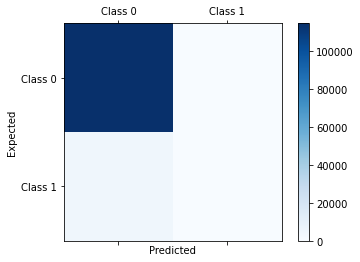

In [17]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat=confusion_matrix(y_test,y_pred)
print('Confusion matrix:\n', conf_mat)

labels=['Class 0','Class 1']
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(conf_mat,cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


Resampling
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. 
It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Let's implement a basic example, which uses the DataFrame.sample method to get random samples each class:

In [18]:
count_class_0,count_class_1=df_train.target.value_counts()

df_class_0=df_train[df_train['target']==0]
df_class_1=df_train[df_train['target']==1]

Random under_sampling
0    21694
1    21694
Name: target, dtype: int64


<AxesSubplot:title={'center':'Count_target'}>

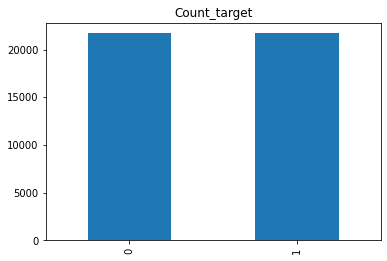

In [19]:
df_class_0_undersam=df_class_0.sample(count_class_1)
df_test_under=pd.concat([df_class_0_undersam,df_class_1],axis=0)

print('Random under_sampling')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar',title='Count_target')

Random over-sampling
0    573518
1    573518
Name: target, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

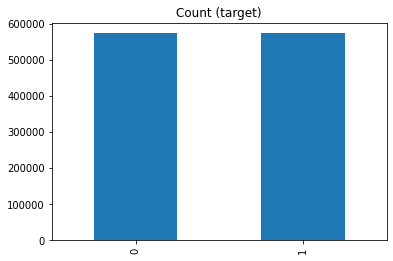

In [21]:
#Random oversample

df_class_1_oversam= df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_oversam],axis=0)

print('Random over-sampling')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar',title='Count (target)')

IMBALANCED-LEARN MODULE
A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [22]:
import imblearn

<AxesSubplot:title={'center':'Count(target)'}>

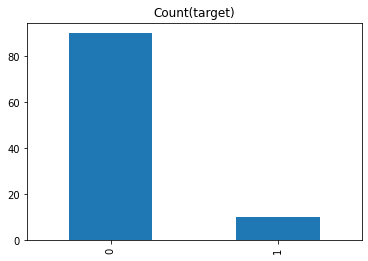

In [24]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10)
df=pd.DataFrame(X)
df['target']=y
df.target.value_counts().plot(kind='bar',title='Count(target)')
                        

In [30]:
def plot_2d_space(X,y,label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers=['o','s']
    for l, c, m in zip(np.unique(y),colors,markers):
        plt.scatter(X[y==l,0],
                   X[y==l,1],
                   c=c,label=l,marker=m)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

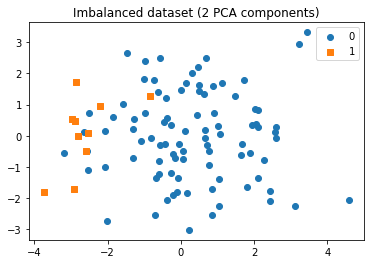

In [31]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
X=pca.fit_transform(X)
plot_2d_space(X,y,'Imbalanced dataset (2 PCA components)')

Over-sampling: SMOTE
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

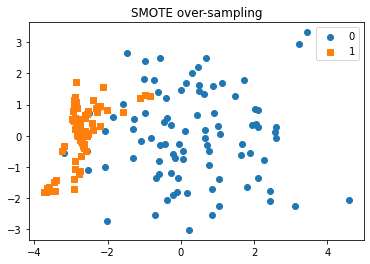

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

Over-sampling followed by under-sampling
Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [41]:
X_sm.shape, y_sm.shape

((180, 2), (180,))

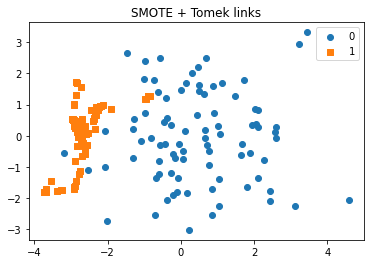

In [43]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_resample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

In [44]:
X_smt.shape, y_smt.shape

((170, 2), (170,))

In [45]:
X.shape,y.shape

((100, 2), (100,))